            count          mean           std           min           25%  \
Adj_Close  3735.0  2.271797e+02  2.024689e+02  7.018571e+00  4.330786e+01   
Close      3735.0  2.271797e+02  2.024689e+02  7.018571e+00  4.330786e+01   
High       3735.0  2.305070e+02  2.051135e+02  7.178571e+00  4.403071e+01   
Low        3735.0  2.236877e+02  1.997704e+02  6.931429e+00  4.276357e+01   
Open       3735.0  2.271396e+02  2.025024e+02  6.960000e+00  4.314571e+01   
Volume     3735.0  1.676829e+07  1.975776e+07  1.144000e+06  5.388100e+06   

                    50%           75%           max  Skewness   Kurtosis  
Adj_Close  1.564500e+02  3.685950e+02  7.720700e+02  0.657391  -0.779567  
Close      1.564500e+02  3.685950e+02  7.720700e+02  0.657391  -0.779567  
High       1.578500e+02  3.749100e+02  7.730000e+02  0.650718  -0.795375  
Low        1.545500e+02  3.626000e+02  7.611200e+02  0.665508  -0.761647  
Open       1.561000e+02  3.694100e+02  7.657600e+02  0.658366  -0.777827  
Volume    

<Figure size 1400x700 with 0 Axes>

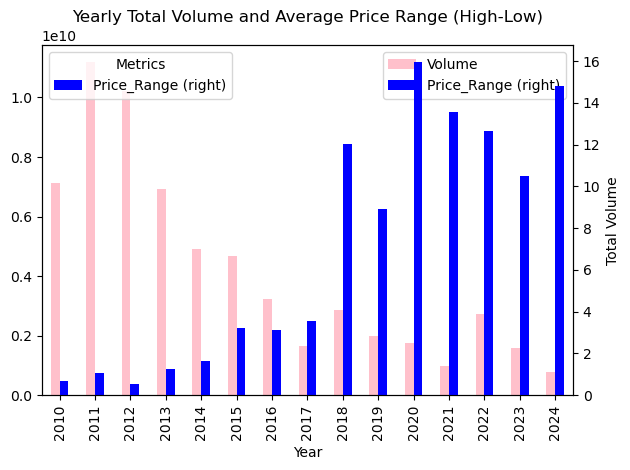

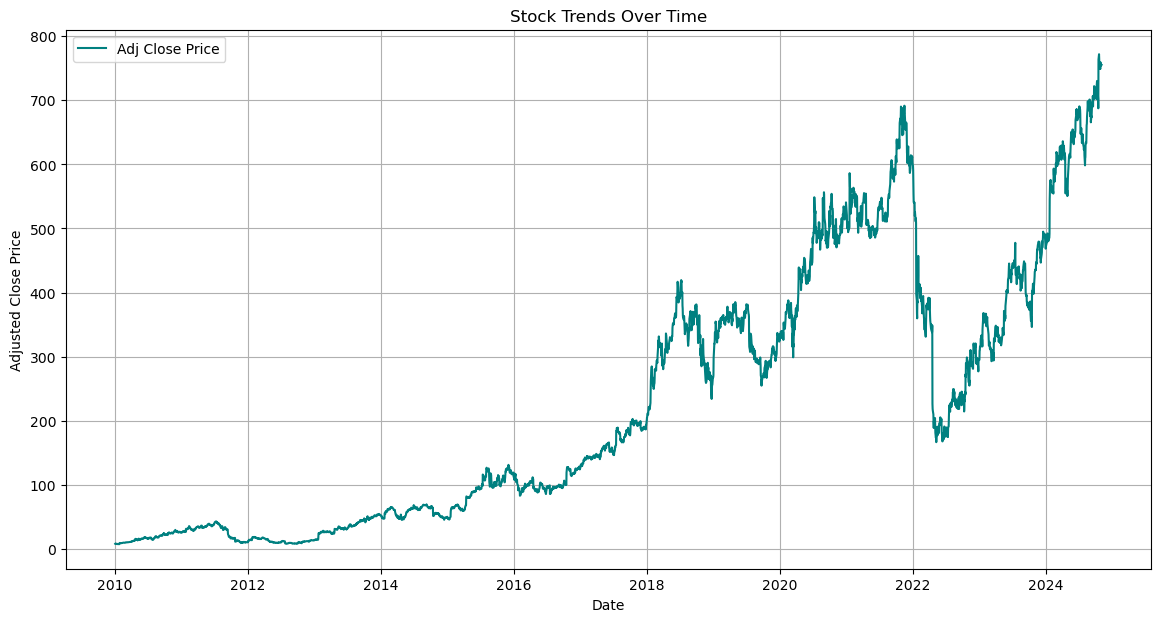

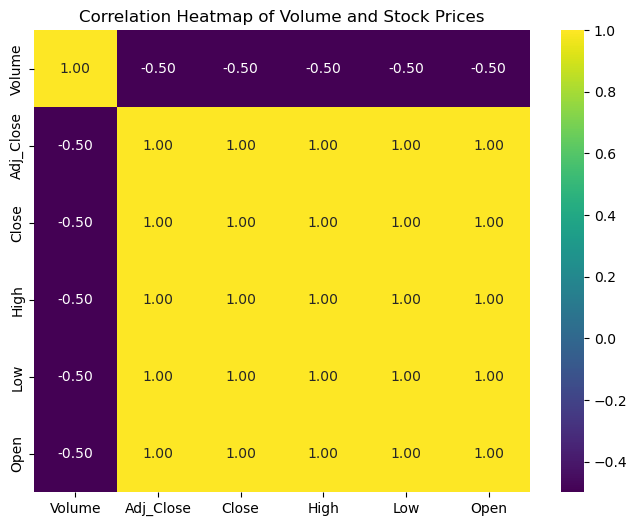

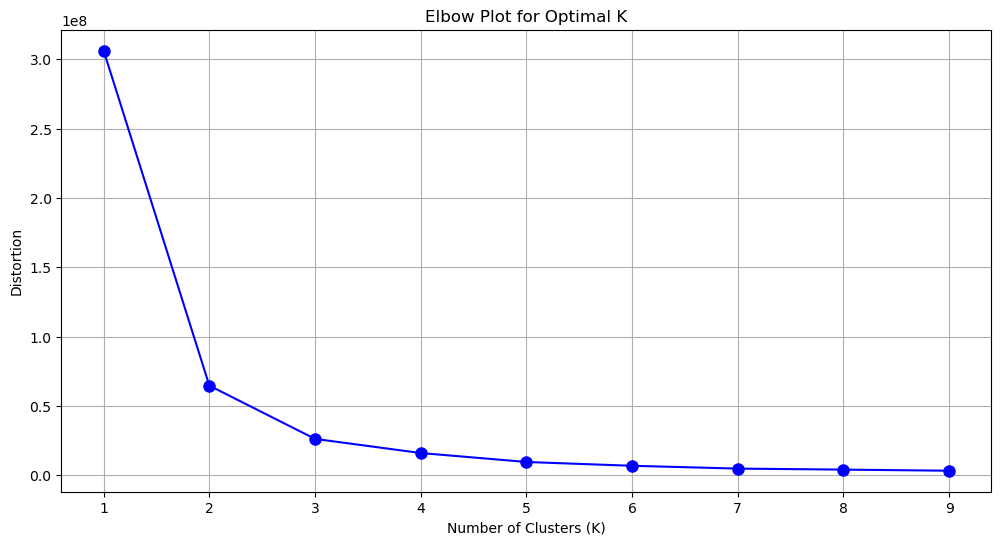

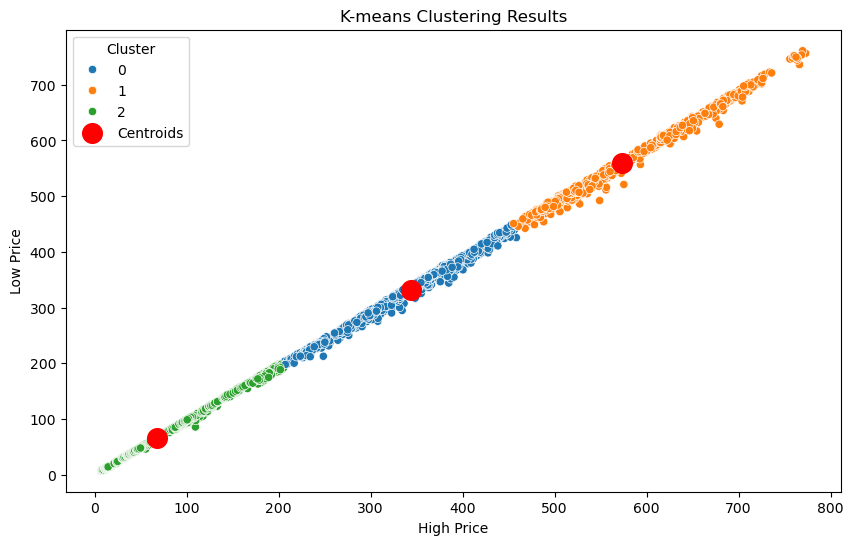

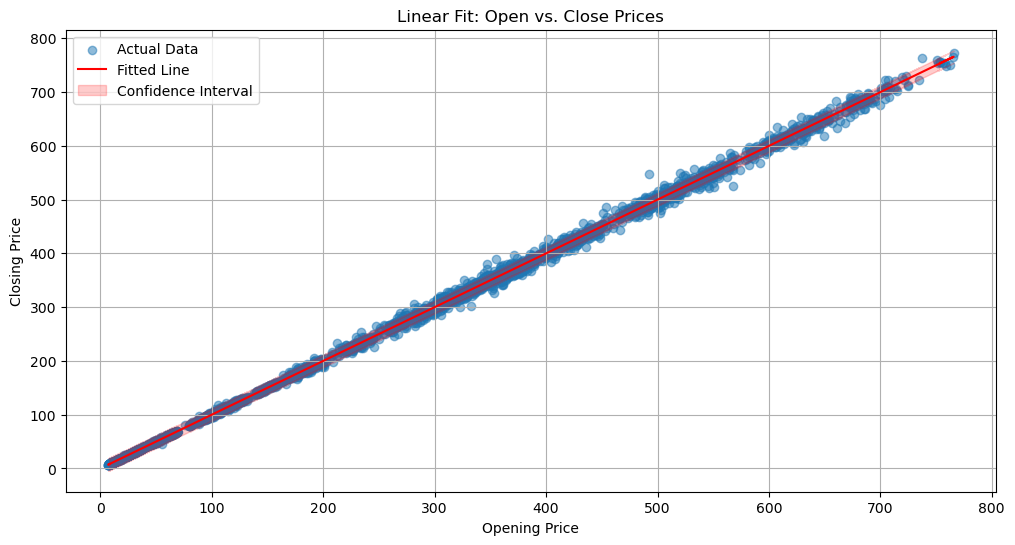

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis

# Load data
file_path = 'Netflix_Data.csv'
data = pd.read_csv(file_path)

# Convert 'Date' to datetime for easier handling
data['Date'] = pd.to_datetime(data['Date'])

# Function to calculate and display statistical moments
def calculate_statistical_moments(data):
    """
    Displays statistical moments including mean, median, standard deviation, skewness, and kurtosis.
    """
    numeric_cols = ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    desc = data[numeric_cols].describe().T
    desc['Skewness'] = data[numeric_cols].apply(skew)
    desc['Kurtosis'] = data[numeric_cols].apply(kurtosis)
    print(desc)


def plot_volume_and_range_by_year(data):
    """
    Plots a bar chart for yearly total trading volume and average price range (High-Low).
    """
    data['Year'] = data['Date'].dt.year
    data['Price_Range'] = data['High'] - data['Low']
    volume_and_range_by_year = data.groupby('Year').agg({
        'Volume': 'sum',
        'Price_Range': 'mean'
    })

    plt.figure(figsize=(14, 7))
    volume_and_range_by_year.plot(kind='bar', secondary_y='Price_Range', color=['pink', 'blue'])
    plt.title('Yearly Total Volume and Average Price Range (High-Low)')
    plt.ylabel('Total Volume')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.legend(title='Metrics', loc='upper left')
    plt.tight_layout()
    plt.show()


def plot_stock_trends(data):
    """
    Plots the stock's adjusted close price over time.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Adj_Close'], label='Adj Close Price', color='teal')
    plt.title('Stock Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.grid()
    plt.legend()
    plt.show()


def plot_volume_price_correlation_heatmap(data):
    """
    Plots a heatmap showing the correlation between Volume and Stock Prices.
    """
    numeric_cols = ['Volume', 'Adj_Close', 'Close', 'High', 'Low', 'Open']
    corr_data = data[numeric_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_data, annot=True, cmap='viridis', fmt=".2f")
    plt.title('Correlation Heatmap of Volume and Stock Prices')
    plt.show()


def elbow_method_and_kmeans(data):
    """
    Applies K-means clustering and plots the elbow plot.
    """
    features = data[['High', 'Low']].dropna()
    X = features.values

    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(K, distortions, 'bo-', markersize=8)
    plt.title('Elbow Plot for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.grid()
    plt.show()

    optimal_k = 3  # Based on the elbow plot
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X)
    data['Cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='High', y='Low', hue='Cluster', data=data, palette='tab10')
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
        s=200, c='red', label='Centroids'
    )
    plt.title('K-means Clustering Results')
    plt.xlabel('High Price')
    plt.ylabel('Low Price')
    plt.legend(title='Cluster')
    plt.show()


def linear_fit_open_vs_close(data):
    """
    Fits a linear model between opening and closing prices and plots the results with confidence intervals.
    """
    data_clean = data[['Open', 'Close']].dropna()

    X = data_clean['Open'].values.reshape(-1, 1)
    y = data_clean['Close'].values

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, alpha=0.5, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Fitted Line')
    plt.fill_between(
        X.flatten(), 
        (y_pred - 1.96 * residuals.std()), 
        (y_pred + 1.96 * residuals.std()), 
        color='red', alpha=0.2, label='Confidence Interval'
    )
    plt.title('Linear Fit: Open vs. Close Prices')
    plt.xlabel('Opening Price')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    plt.show()

# Call functions
calculate_statistical_moments(data)
plot_volume_and_range_by_year(data)
plot_stock_trends(data)
plot_volume_price_correlation_heatmap(data)
elbow_method_and_kmeans(data)
linear_fit_open_vs_close(data)
